<a href="https://colab.research.google.com/github/angeruzzi/RegressionModel_ProdutividadeAgricola/blob/main/RegressionModel_ProdutividadeAgricola_Amendoin.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#Predição Produtividade Agrícola: Produção de Amendoin

---------------------------------
**Autor**: [Alessandro S. Angeruzzi](https://www.linkedin.com/in/alessandroangeruzzi/)

**Licença**: Creative Commons

---------------------------------

##**Sumário**

1. [Introdução](#intro)
2. [Bibliotecas](#bibliotecas)
3. [Dados](#dados)
4. [Análises](#analise)
5. [Modelagem](#modelagem)
    *	[Funções](#funcoes)
    *	[Modelos](#modelos)
    *	[Teste Inicial](#teste)
    *	[Seleção de Variáveis](#selecao)
        *	[Maior Correlação](#correlacao)
        *	[Features Importantes](#fimportantes)
    *	[Hipertunagem](#hipertunagem)
    *	[Modelo Final](#final)
6. [Conclusão](#conclusao)
7. [Fontes](#fontes)


##**1 - Introdução** <a name="intro"></a>

O amendoim é um grão que sempre esteve presente na cultura brasileira, não somente em doces mas também em alguns pratos salgados e muito consumido também como aperitivo. 

A planta é original da América do Sul, porém hoje já é encontrada em quase todo o mundo principalmente na África e Ásia e a semente é consumida mundialmente, principalmente na forma inteira torrada como também em forma de óleo, pasta e farinha na panificação.

O Brasil ocupa apenas a 14ª posição na produção mundial, sendo responsável por pouco mais de 1% dessa produção, já no quadro de exportadores ocupa a 5ª posição; ele é produzido em praticamente todo o território nacional, mas o estado de SP se destaca concentrando cerca de 90% da produção nacional, que também é onde há a maior produtividade, próximo de 3.500 kg/ha, que está entre as maiores mundiais e fica bem além da conseguida no Nordeste que é cerca de 1.164 kg/ha, esta diferença pode ser devida a tradição da produção no interior de SP mas pode ser um indicativo que o clima é um fator de grande importância.

Neste trabalho exploro a relação da produtividade com os dados meteorológicos tentando não somente encontrar a relação mas também um modelo de predição de produtividade com esses dados.

##**2 - Bibliotecas** <a name="bibliotecas"></a>

Importação das Bilbiotecas Python utilizadas

In [111]:
import numpy as np
import pandas as pd

import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.linear_model import LinearRegression
from sklearn.linear_model import Ridge
from sklearn.linear_model import LassoLars
from sklearn.linear_model import BayesianRidge
from sklearn.neighbors import KNeighborsRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.ensemble import GradientBoostingRegressor
from lightgbm import LGBMRegressor

from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import QuantileTransformer
from sklearn.preprocessing import Normalizer

import sklearn.metrics as me
from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_validate
from sklearn.model_selection import RepeatedKFold
from sklearn.model_selection import GridSearchCV

import warnings
warnings.filterwarnings('ignore')

##**3 - Dados** <a name="dados"></a>
O dados utilizados são referentes a 6 cidades do interior do estado de SP: Jaboticabal, Tupã, herculandia, Pompéia, Iacri e Marília.

Eles contêm:
*   Local      : Cidade de coleta dos dados
*   ano        : Ano do Registro
*   area       : Área de cultivo
*   produtividade de amendoim	:	t/ha

e as demais features são de dados meteorológicos dessas cidades, 
são todas numéricas e cada uma possui 5 colunas, 4 referentes a medição de diferentes meses, mais a média ou a soma desse período: 
_SEP (Setembro), _OCT (Outubro), _NOV (Novembro), _DEC (Dezembro) e _ANN (Média ou Soma)
*   temp	      :	temperatura do ar (°C)
*   ue 	      :	umidade específica (g vapor/kg ar)
*   ur	        :	umidade relativa (%)
*   vv	        :	velocidade do vento (m/s)
*   tmax	      :	temperatura máxima absoluta do ar (°C)
*   tmin	      :	temperatura mínima absoluta do ar (°C)
*   umidsolos	:	umidade do solo (0-100%)
*   tamplitude	:	amplitude da temperatura do ar (°C)
*   Qo	        :	Irradiância solar no topo da atmosfera (MJ/m2dia)
*   Prec	      :	Precipitação pluvial (mm)
*   Qg	        :	Irradiância Solar Global (MJ/m2dia)
*   ETP	      :	Evapotranspiração Potencial (mm)

Os períodos utilizados, setembro a dezembro, são referentes ao ciclo principal de cultivo no interior de SP:  
* Setembro: Plantio e Desenvolvimento Vegetativo 
* Outubro: Florada
* Novembro: Desenvolvimento das vagens
* Dezembro: Maturação e inicio da Colheita

In [112]:
fonte = 'https://github.com/angeruzzi/Datasource/blob/1c3af4c563eaa9b80ab627ef619e66c82a8e1ad4/dados_producao_amendoim.xlsx?raw=true'
dados  = pd.read_excel(fonte)

In [113]:
#Tamanho do Dataframe: 64 features e 222 registros
dados.shape

(222, 64)

In [114]:
dados.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 222 entries, 0 to 221
Data columns (total 64 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Local           222 non-null    object 
 1   ano             222 non-null    int64  
 2   area            222 non-null    int64  
 3   produtividade   222 non-null    float64
 4   temp_SEP        222 non-null    float64
 5   temp_OCT        222 non-null    float64
 6   temp_NOV        222 non-null    float64
 7   temp_DEC        222 non-null    float64
 8   temp_ANN        222 non-null    float64
 9   ue_SEP          222 non-null    float64
 10  ue_OCT          222 non-null    float64
 11  ue_NOV          222 non-null    float64
 12  ue_DEC          222 non-null    float64
 13  ue_ANN          222 non-null    float64
 14  ur_SEP          222 non-null    float64
 15  ur_OCT          222 non-null    float64
 16  ur_NOV          222 non-null    float64
 17  ur_DEC          222 non-null    flo

In [115]:
dados.head()

,Local,ano,area,produtividade,temp_SEP,temp_OCT,temp_NOV,temp_DEC,temp_ANN,ue_SEP,ue_OCT,ue_NOV,ue_DEC,ue_ANN,ur_SEP,ur_OCT,ur_NOV,ur_DEC,ur_ANN,vv_SEP,vv_OCT,vv_NOV,vv_DEC,vv_ANN,tmax_SEP,tmax_OCT,tmax_NOV,tmax_DEC,tmax_ANN,tmin_SEP,tmin_OCT,tmin_NOV,tmin_DEC,tmin_ANN,umidsolos_SEP,umidsolos_OCT,umidsolos_NOV,umidsolos_DEC,umidsolos_ANN,tamplitude_SEP,tamplitude_OCT,tamplitude_NOV,tamplitude_DEC,tamplitude_ANN,Qo_SEP,Qo_OCT,Qo_NOV,Qo_DEC,Qo_ANN,Prec_SEP,Prec_OCT,Prec_NOV,Prec_DEC,Prec_ANN,Qg_SEP,Qg_OCT,Qg_NOV,Qg_DEC,Qg_ANN,ETP_SEP,ETP_OCT,ETP_NOV,ETP_DEC,ETP_ANN
0,Jaboticabal,1984,6500,4561.3,22.1,26.1,25.6,23.6,24.4,9.89,12.27,13.49,15.81,12.9,59.9,58.9,65.5,82.5,66.7,2.52,2.53,2.64,2.11,2.5,34.8,37.4,38.5,31.0,35.4,9.4,11.4,15.4,16.4,13.2,65.0,64.0,66.0,82.0,69.3,25.4,26.0,23.1,14.6,22.3,33.41,38.02,41.02,42.24,38.7,95.7,66.3,195.3,259.5,616.8,18.93,23.22,23.12,20.20,21.4,90.2,121.7,128.6,122.2,462.7
1,Jaboticabal,1985,7031,4535.3,25.7,27.5,24.7,25.0,25.7,8.61,10.07,13.43,14.83,11.7,43.8,45.4,67.9,72.8,57.5,2.95,2.59,2.30,2.12,2.5,38.8,39.6,38.1,35.5,38.0,14.8,14.5,14.6,16.1,15.0,59.0,59.0,71.0,72.0,65.3,24.0,25.1,23.5,19.4,23.0,33.37,37.98,41.00,42.23,38.6,18.6,63.3,213.3,189.6,484.8,19.96,24.18,25.32,25.15,23.7,105.0,127.8,124.1,129.4,486.3
2,Jaboticabal,1986,5610,4500.9,22.9,25.3,26.1,23.6,24.5,9.89,10.44,13.12,15.93,12.3,57.9,53.6,61.9,83.2,64.2,2.92,2.83,2.58,2.13,2.6,36.5,39.2,37.5,31.3,36.1,11.3,10.0,11.8,17.8,12.7,64.0,62.0,65.0,80.0,67.8,25.2,29.2,25.7,13.5,23.4,33.32,37.96,40.99,42.23,38.6,23.1,75.6,136.8,345.6,581.1,18.77,22.70,23.52,19.84,21.2,93.5,117.6,131.0,122.0,464.1
3,Jaboticabal,1987,5000,4473.5,24.4,25.4,25.1,24.1,24.8,10.68,12.82,14.47,15.87,13.5,57.1,63.4,70.9,80.9,68.1,3.26,2.59,2.47,2.05,2.6,37.6,39.2,37.3,31.4,36.4,12.0,13.2,16.3,15.9,14.4,61.0,65.0,71.0,77.0,68.5,25.6,26.0,20.9,15.6,22.0,33.29,37.93,40.98,42.23,38.6,78.6,101.4,205.8,191.1,576.9,18.14,21.29,24.25,23.14,21.7,99.5,117.9,126.1,124.4,467.9
4,Jaboticabal,1988,4000,4884.2,26.3,24.8,23.7,24.9,24.9,8.30,12.45,13.43,14.95,12.3,40.5,63.4,71.5,74.2,62.4,3.18,2.73,2.74,1.99,2.7,40.4,37.1,33.7,35.4,36.7,14.3,14.4,12.3,16.9,14.5,59.0,64.0,70.0,71.0,66.0,26.1,22.7,21.4,18.5,22.2,33.43,38.04,41.04,42.25,38.7,11.1,170.7,113.1,201.0,495.9,19.21,17.56,23.87,23.48,21.0,107.8,115.7,118.9,128.7,471.1


In [116]:
pd.set_option('display.max_rows', None, 'display.max_columns', None)
dados.describe().T

,count,mean,std,min,25%,50%,75%,max
ano,222.0,2002.000000,10.701207,1984.00,1993.0000,2002.000,2011.0000,2020.00
area,222.0,3259.409910,1690.075381,350.00,2000.0000,3040.000,4200.0000,9340.00
produtividade,222.0,4697.263063,666.001670,3147.80,4223.1000,4679.450,5085.0000,6705.90
temp_SEP,222.0,23.197748,1.870525,18.70,21.8250,23.000,24.5000,28.00
temp_OCT,222.0,25.002703,1.612309,21.10,23.7000,24.700,26.1000,29.20
temp_NOV,222.0,25.198198,1.008918,22.80,24.5000,25.100,25.8000,27.70
temp_DEC,222.0,25.344144,0.941279,22.90,24.7000,25.300,25.9750,27.70
temp_ANN,222.0,24.696847,0.985110,21.90,24.1250,24.600,25.2000,27.20
ue_SEP,222.0,10.477928,1.296669,6.59,9.7175,10.310,11.2900,14.28
ue_OCT,222.0,12.685450,1.233460,9.46,12.0200,12.730,13.4300,15.62


##**4 - Análises** <a name="analise"></a>

Os dados coletados são referentes a produção de amendoin de 6 cidades do interior de SP: Jaboticabal, Tupa, Herculandia, Pompeia, Iacri e Marilia, dos anos de 1984 a 2020.

In [117]:
display(dados['Local'].unique())
display(dados['ano'].unique())

array(['Jaboticabal', 'Tupa', 'Herculandia', 'Pompeia', 'Iacri',
       'Marilia'], dtype=object)

array([1984, 1985, 1986, 1987, 1988, 1989, 1990, 1991, 1992, 1993, 1994,
       1995, 1996, 1997, 1998, 1999, 2000, 2001, 2002, 2003, 2004, 2005,
       2006, 2007, 2008, 2009, 2010, 2011, 2012, 2013, 2014, 2015, 2016,
       2017, 2018, 2019, 2020])

Das localidades, Jabotical teve em média uma área de plantio maior e Marilia a menor.

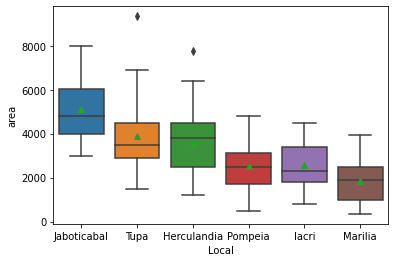

In [118]:
sns.boxplot(x='Local', y='area', data=dados, showmeans=True)

Já na produtividade Marilia se destacou bastante das demais, que ficaram com médias próximas, e Iacri foi a que teve uma maior variação.

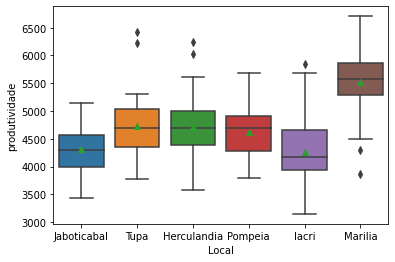

In [119]:
sns.boxplot(x='Local', y='produtividade', data=dados, showmeans=True)

A produtividade parece ter um variação maior quando se tem uma area de plantio menor, e conforme a área aumenta começa a haver uma diminuição dessa variação, ficando entre 4 e 5 mil ton, que é também próxima a média geral da produtividade. Mas no geral não parece haver correlação entre a área e produtividade.

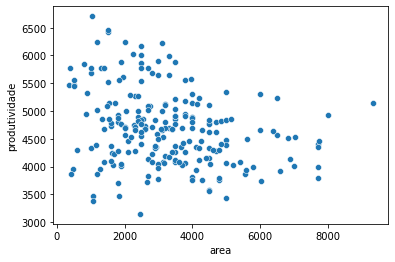

In [120]:
sns.scatterplot(x='area', y='produtividade', data=dados)

O ano avaliado também não tem correlação com a produtividade medida. 

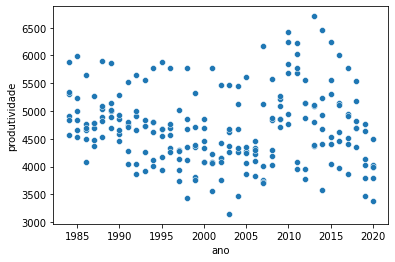

In [121]:
sns.scatterplot(x='ano', y='produtividade', data=dados)

E a presença de Outliers na variável alvo da amostra é baixa:

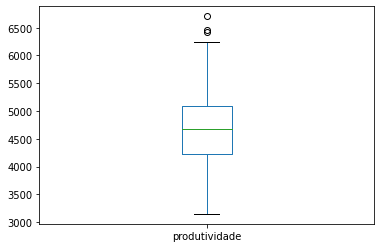

In [122]:
dados['produtividade'].plot(kind = 'box');

Analisando a Correlação apenas pelas features consolidadas: 

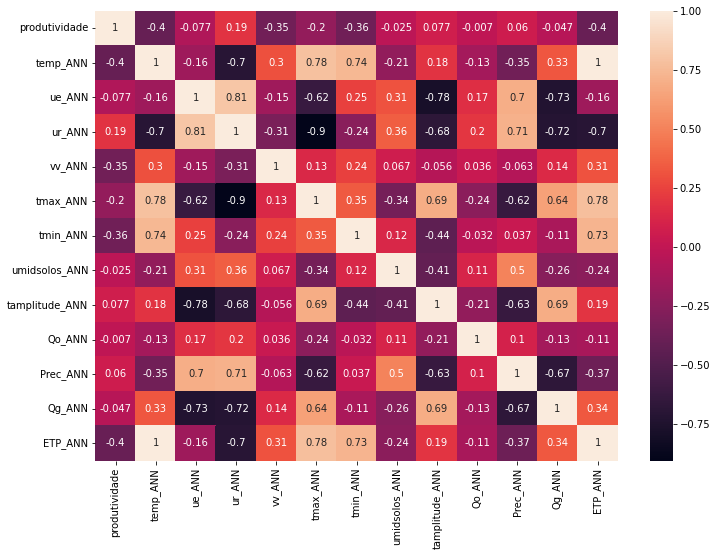

In [123]:
fig, ax = plt.subplots()
fig.set_size_inches(11.7, 8.27)
sns.heatmap(dados[["produtividade"
,"temp_ANN"
,"ue_ANN"
,"ur_ANN"
,"vv_ANN"
,"tmax_ANN"
,"tmin_ANN"
,"umidsolos_ANN"
,"tamplitude_ANN"
,"Qo_ANN"
,"Prec_ANN"
,"Qg_ANN"
,"ETP_ANN"]].corr(), annot = True, ax = ax)

Fica claro na tabela de correlação a relação direta entre os dados de ETP (Evapotranspiração Potêncial) e Temperatura, visto que o cálculo do primeiro é realizado em função do segundo, então optei por remover os dados de ETP.

E também como a intenção é a construção de um modelo para previsões e de forma independente a localidade, também serão removidas as features de Local, ano e area.

In [124]:
dados = dados.loc[:,'produtividade':'Qg_ANN']
dados.head()

,produtividade,temp_SEP,temp_OCT,temp_NOV,temp_DEC,temp_ANN,ue_SEP,ue_OCT,ue_NOV,ue_DEC,ue_ANN,ur_SEP,ur_OCT,ur_NOV,ur_DEC,ur_ANN,vv_SEP,vv_OCT,vv_NOV,vv_DEC,vv_ANN,tmax_SEP,tmax_OCT,tmax_NOV,tmax_DEC,tmax_ANN,tmin_SEP,tmin_OCT,tmin_NOV,tmin_DEC,tmin_ANN,umidsolos_SEP,umidsolos_OCT,umidsolos_NOV,umidsolos_DEC,umidsolos_ANN,tamplitude_SEP,tamplitude_OCT,tamplitude_NOV,tamplitude_DEC,tamplitude_ANN,Qo_SEP,Qo_OCT,Qo_NOV,Qo_DEC,Qo_ANN,Prec_SEP,Prec_OCT,Prec_NOV,Prec_DEC,Prec_ANN,Qg_SEP,Qg_OCT,Qg_NOV,Qg_DEC,Qg_ANN
0,4561.3,22.1,26.1,25.6,23.6,24.4,9.89,12.27,13.49,15.81,12.9,59.9,58.9,65.5,82.5,66.7,2.52,2.53,2.64,2.11,2.5,34.8,37.4,38.5,31.0,35.4,9.4,11.4,15.4,16.4,13.2,65.0,64.0,66.0,82.0,69.3,25.4,26.0,23.1,14.6,22.3,33.41,38.02,41.02,42.24,38.7,95.7,66.3,195.3,259.5,616.8,18.93,23.22,23.12,20.20,21.4
1,4535.3,25.7,27.5,24.7,25.0,25.7,8.61,10.07,13.43,14.83,11.7,43.8,45.4,67.9,72.8,57.5,2.95,2.59,2.30,2.12,2.5,38.8,39.6,38.1,35.5,38.0,14.8,14.5,14.6,16.1,15.0,59.0,59.0,71.0,72.0,65.3,24.0,25.1,23.5,19.4,23.0,33.37,37.98,41.00,42.23,38.6,18.6,63.3,213.3,189.6,484.8,19.96,24.18,25.32,25.15,23.7
2,4500.9,22.9,25.3,26.1,23.6,24.5,9.89,10.44,13.12,15.93,12.3,57.9,53.6,61.9,83.2,64.2,2.92,2.83,2.58,2.13,2.6,36.5,39.2,37.5,31.3,36.1,11.3,10.0,11.8,17.8,12.7,64.0,62.0,65.0,80.0,67.8,25.2,29.2,25.7,13.5,23.4,33.32,37.96,40.99,42.23,38.6,23.1,75.6,136.8,345.6,581.1,18.77,22.70,23.52,19.84,21.2
3,4473.5,24.4,25.4,25.1,24.1,24.8,10.68,12.82,14.47,15.87,13.5,57.1,63.4,70.9,80.9,68.1,3.26,2.59,2.47,2.05,2.6,37.6,39.2,37.3,31.4,36.4,12.0,13.2,16.3,15.9,14.4,61.0,65.0,71.0,77.0,68.5,25.6,26.0,20.9,15.6,22.0,33.29,37.93,40.98,42.23,38.6,78.6,101.4,205.8,191.1,576.9,18.14,21.29,24.25,23.14,21.7
4,4884.2,26.3,24.8,23.7,24.9,24.9,8.30,12.45,13.43,14.95,12.3,40.5,63.4,71.5,74.2,62.4,3.18,2.73,2.74,1.99,2.7,40.4,37.1,33.7,35.4,36.7,14.3,14.4,12.3,16.9,14.5,59.0,64.0,70.0,71.0,66.0,26.1,22.7,21.4,18.5,22.2,33.43,38.04,41.04,42.25,38.7,11.1,170.7,113.1,201.0,495.9,19.21,17.56,23.87,23.48,21.0


##**5 - Modelagem** <a name="modelagem"></a>

###**5.1 - Funções** <a name="funcoes"></a>

No tratamento dos dados vou aplicar 3 técnicas diferentes e avaliar nos modelos qual irá trazer melhores resultados:
* Padronização (Standard)
* Transformação pelos Quantis (Quantile)
* Normalização (Normalizer)

In [125]:
#Tratamento dos Dados
lista_transf = ['Standard', 'Quantile', 'Normalizer']

def transformacao(dadosX):

  dadosTX = []
  #Standard
  escalaS = StandardScaler().fit(dadosX)
  transfX = escalaS.transform(dadosX)
  df = pd.DataFrame(transfX, columns=dadosX.columns) #Transformando o retorno de numpy.ndarray para data frame
  dadosTX.append(df)

  #Quantile
  escalaQ = QuantileTransformer().fit(dadosX)
  transfX = escalaQ.transform(dadosX)
  df = pd.DataFrame(transfX, columns=dadosX.columns)
  dadosTX.append(df) 

  #Normalizer
  escalaN = Normalizer().fit(dadosX)
  transfX = escalaN.transform(dadosX)
  df = pd.DataFrame(transfX, columns=dadosX.columns)
  dadosTX.append(df)

  return dadosTX

Para validação dos modelos vou utilizar a validação cruzada e retornar 3 medidas diferentes: 
* R Quadrado (R2)
* Erro Quadrático Médio (EQM)
* Erro Médio Absoluto (EMA)

In [126]:
#Teste de Modelos
def CompareML_kfold(treinoX, treinoy, lista_de_modelos, nome_dos_modelos, validacao):  
  lista_medidas = ['r2','neg_mean_squared_error', 'neg_mean_absolute_error']
  nome_medidas = ['R2','EQM','EMA']

  resultados0 = {}
  
  for i in range(len(lista_de_modelos)):
    modelo = lista_de_modelos[i]

    testes = cross_validate(modelo, treinoX, treinoy, cv=validacao, scoring=lista_medidas)
    
    r2  = testes['test_r2'].mean()
    eqm = testes['test_neg_mean_squared_error'].mean()
    ema = testes['test_neg_mean_absolute_error'].mean()

    resultados0[nome_dos_modelos[i]] = [r2, eqm, ema]
  resultados = pd.DataFrame(resultados0, index = nome_medidas).T

  return resultados

Dado a quantidade de features presente na base é importante verificar se há um subconjunto de variáveis que possa ser treinado um modelo que ofereça um resultado melhor ou pelo menos no mesmo patamar do que se utilizarmos o conjunto completo das features.
Para fazer essa avaliação criei a função abaixo que recebe um modelo, a base completa de testes e a lista das features na ordem específica que se deseja verificar, a função roda diversas simulações incrementando uma variável por vez nos testes e retorna os resultados obtidos para cada subconjunto. 

In [127]:
#Seleção de Features

def SelectFeatures(modelo, dadosX, dadosy, validacaoS, features):
  i = 0
  resultados = pd.DataFrame(columns=['Qtd','Performance'])
  for n in np.arange(2,features.count()+1):
    featuresS = features.iloc[0:n].index.tolist()
    dadosSX = dadosX[featuresS]  
    testes = cross_validate(modelo, dadosSX, dadosy, cv=validacaoS, scoring='r2')
    r2 = testes['test_score'].mean()
    resultados.loc[i] = [n, r2]
    i += 1
  return resultados

Como passo final após as seleções de modelo e conjunto de features aplicarei um técnica de hipertunagem de parâmetros nos modelos para otimização e tentar melhorar o resultado obtido.
A função abaixo irá facilitar essa verificação, onde recebe uma lista de modelos e uma lista de parâmetros com um range variações que serão testados utilizando a função GridSearchCV da biblioteca Scikit learn.


In [128]:
#Tunagem de Hiperparâmetros 
def Tunagem(modelo, treino, targets, parametros, validacao, score):    
    search = GridSearchCV(modelo, param_grid = parametros,
                                  scoring = score, cv = validacao, 
                                  verbose = 1, n_jobs = -1)
    search.fit(treino, targets) 
    bestModel = search.best_estimator_
    bestScore = search.best_score_
    bestParam = search.best_params_

    return {
            'bestModel': bestModel,
            'bestScore': bestScore,
            'bestParam': bestParam
    }

###**5.2 - Modelos** <a name="modelos"></a>

Para os testes serão utilizados 9 modelos de regressão, sendo 4
Modelos lineares: 
* LinearRegression
* LassoLars
* Ridge
* BayesianRidge

e 5 Modelos Não Lineares: 
* KNeighborsRegressor 
* DecisionTreeRegressor 
* RandomForestRegressor 
* GradientBoostingRegressor 
* LGBMRegressor

In [129]:
#Declaração dos modelos que serão utilizados nos testes

lista_de_modelos = [
                      LinearRegression(),
                      LassoLars(),
                      Ridge(),
                      BayesianRidge(),
                      KNeighborsRegressor(n_neighbors = 5),
                      DecisionTreeRegressor(max_depth = 7, min_samples_split=3),
                      RandomForestRegressor(),
                      GradientBoostingRegressor(),
                      LGBMRegressor()
                  ]

nome_dos_modelos = [
                      'LinearReg',
                      'LassoLars',
                      'Ridge',
                      'BayesianRidge',
                      'Knn',
                      'DTree',                    
                      'RanFor',
                      'GradBoost',
                      'LGBM'
                  ]

###**5.3 - Teste Inicial** <a name="teste"></a>

Inicialmente rodo um teste com todas as features com as 3 transformações citadas

In [130]:
dadosX = dados.loc[:,'temp_SEP':]
dadosy = dados['produtividade']
dadosTX = transformacao(dadosX)

validacao = RepeatedKFold(n_splits = 10, n_repeats = 30)

resultado1 = []
for i in np.arange(len(lista_transf)):
  res = CompareML_kfold(dadosTX[i], dadosy, lista_de_modelos, nome_dos_modelos, validacao)
  resultado1.append(res)

for i in np.arange(len(resultado1)):
  print("Transformação : "+lista_transf[i])
  print(resultado1[i])
  print()

Transformação : Standard
                     R2            EQM         EMA
LinearReg     -0.041260 -424015.223907 -515.691430
LassoLars      0.207619 -320116.732030 -449.329009
Ridge          0.150701 -340090.803738 -457.714613
BayesianRidge  0.207485 -323293.358033 -448.738376
Knn            0.170248 -343184.717631 -461.423020
DTree         -0.135090 -454816.323149 -531.600733
RanFor         0.312657 -279147.654029 -424.165288
GradBoost      0.261611 -299910.279849 -433.581236
LGBM           0.254975 -301548.798497 -436.251318

Transformação : Quantile
                     R2            EQM         EMA
LinearReg      0.045993 -387180.934827 -485.910632
LassoLars      0.239509 -313072.100104 -438.587245
Ridge          0.217186 -320076.230236 -442.332784
BayesianRidge  0.216768 -324985.191969 -449.551737
Knn            0.226162 -319800.301209 -443.259459
DTree         -0.148451 -455489.487155 -537.994350
RanFor         0.306857 -284084.905890 -426.530124
GradBoost      0.227005 -307124

No teste com todos os campos os melhores resultados em media foram obtidos na tranformação *Quantile* e independente da transformação os métodos não lineares obtiveram os melhores R2, destacando o *Randon Forest* e o *LGBM*.

Uma observação importante é que alguns métodos tiveram um R2 negativo, isto indica que o método não conseguiu convergir adequadamente.

###**5.4 - Seleção de Variáveis** <a name="selecao"></a>

Agora para tentar obter um melhor resultado irei aplicar 2 técnicas de seleção de variáveis:
* Maior Correlação
* Pelas Features mais importantes pela classificação do Randon Forest

####**5.4.1 - Maior Correlação** <a name="correlacao"></a>

Neste método calculo a correlação de todas as features independentes em relação a variável alvo, pego o valor absoluto e assim ordeno pelos valores maiores independente se a correlação é positiva ou negativa. 

In [131]:
df_corProdut = dados.corr()['produtividade']
df_corProdut.drop(labels=['produtividade'],inplace=True)
df_corProdut = df_corProdut.abs()
df_corProdut.sort_values(inplace=True, ascending=False)
df_corProdut

temp_OCT          0.401774
temp_ANN          0.399748
Qo_DEC            0.379262
Qo_SEP            0.369492
Qo_NOV            0.357306
tmin_ANN          0.356473
tmin_OCT          0.353817
vv_ANN            0.352202
vv_SEP            0.343114
vv_OCT            0.326006
temp_SEP          0.323144
vv_NOV            0.322472
temp_NOV          0.309277
vv_DEC            0.304819
Qo_OCT            0.289447
tmax_OCT          0.278661
ur_OCT            0.257458
tamplitude_DEC    0.235713
tmin_DEC          0.226548
ur_SEP            0.225764
ue_DEC            0.221084
tmin_NOV          0.212696
Prec_SEP          0.211321
tmax_SEP          0.210221
tmax_ANN          0.204730
ur_ANN            0.186805
tmax_NOV          0.181309
tmin_SEP          0.149398
ur_DEC            0.142259
umidsolos_DEC     0.119385
tmax_DEC          0.113341
ur_NOV            0.105907
Prec_OCT          0.098858
Qg_SEP            0.094924
Prec_DEC          0.082669
ue_ANN            0.077345
tamplitude_ANN    0.076948
u

Com as features ordenadas pelas de maiores correlação posso utilizar a função de teste de seleção explicada acima em "Funções"; para rodar o teste utilizei o modelo Lasso Lars visto ter sido o melhor modelo linear no teste anterior com todas as variáveis. 

In [132]:
modelo = LassoLars()
validacao = RepeatedKFold(n_splits = 10, n_repeats = 30)
resultados2 = []
dadosX = dados.loc[:,'temp_SEP':]
dadosy = dados['produtividade']
dadosTX = transformacao(dadosX)

for t in [0,1,2]:
  r = SelectFeatures(modelo, dadosTX[t], dadosy, validacao, df_corProdut)
  resultados2.append(r)

In [133]:
best_p1 = 0
best_t1 = 0
best_q1 = 0

for t in [0,1,2]:
  for q in np.arange(len(resultados2[t])):
    if resultados2[t]['Performance'][q] > best_p1:
      best_p1 = resultados2[t]['Performance'][q]
      best_t1 = t
      best_q1 = int(resultados2[t]['Qtd'][q])

Após rodar o teste de seleção foi obtido o seguinte resultado:

In [134]:
print("Melhor Performance:", best_p1)
print("com a Qtd de features:", best_q1)
print("na Transformação:", lista_transf[best_t1])

Melhor Performance: 0.23526305630338537
com a Qtd de features: 55
na Transformação: Quantile


Abaixo podemos ver todos os resultados obtidos de forma gráfica:

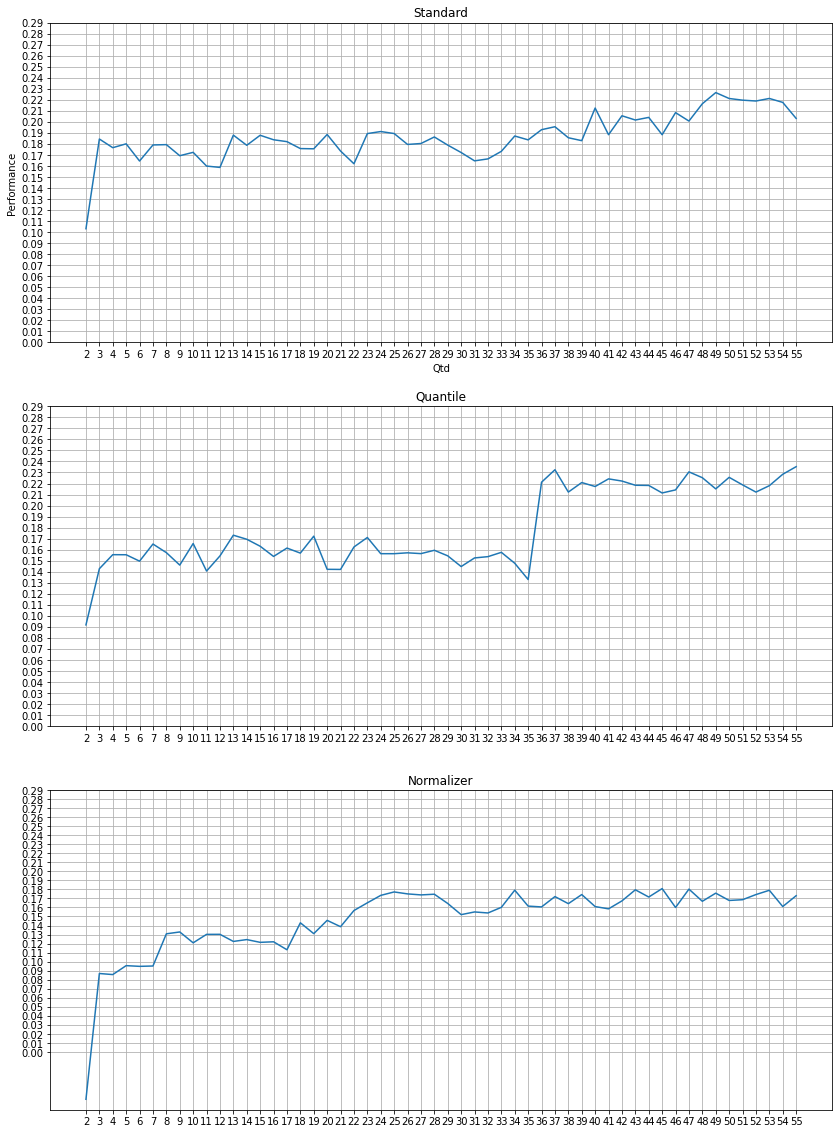

In [135]:
fig, axs = plt.subplots(3,  figsize = [14,20])

for n in [0,1,2]:
  axs[n].plot(resultados2[n]['Qtd'], resultados2[n]['Performance'])
  axs[n].set_title(lista_transf[n])
  axs[n].grid()
  axs[n].set_xticks(resultados2[0]['Qtd'])
  axs[n].set_yticks(np.arange(0.00, 0.30,0.01))

axs[0].set(xlabel='Qtd', ylabel='Performance')
plt.show()

Com a definição da quantidade de features faço agora a seleção dos campos que serão utilizados para teste dos modelos

In [136]:
features_correl = df_corProdut.iloc[0:best_q1].index.tolist()
features_correl

['temp_OCT',
 'temp_ANN',
 'Qo_DEC',
 'Qo_SEP',
 'Qo_NOV',
 'tmin_ANN',
 'tmin_OCT',
 'vv_ANN',
 'vv_SEP',
 'vv_OCT',
 'temp_SEP',
 'vv_NOV',
 'temp_NOV',
 'vv_DEC',
 'Qo_OCT',
 'tmax_OCT',
 'ur_OCT',
 'tamplitude_DEC',
 'tmin_DEC',
 'ur_SEP',
 'ue_DEC',
 'tmin_NOV',
 'Prec_SEP',
 'tmax_SEP',
 'tmax_ANN',
 'ur_ANN',
 'tmax_NOV',
 'tmin_SEP',
 'ur_DEC',
 'umidsolos_DEC',
 'tmax_DEC',
 'ur_NOV',
 'Prec_OCT',
 'Qg_SEP',
 'Prec_DEC',
 'ue_ANN',
 'tamplitude_ANN',
 'ue_NOV',
 'Prec_ANN',
 'umidsolos_OCT',
 'Qg_ANN',
 'ue_SEP',
 'Prec_NOV',
 'Qg_NOV',
 'umidsolos_SEP',
 'tamplitude_SEP',
 'umidsolos_ANN',
 'Qg_DEC',
 'umidsolos_NOV',
 'tamplitude_OCT',
 'Qg_OCT',
 'Qo_ANN',
 'temp_DEC',
 'tamplitude_NOV',
 'ue_OCT']

E rodo novamente os modelos com a seleção de features para observar os resultados

In [137]:
dadosCorX = dados[features_correl]
dadosy = dados['produtividade']
dadosCorTX = transformacao(dadosCorX)
validacao = RepeatedKFold(n_splits = 10, n_repeats = 30)

resultado2 = []
for i in np.arange(len(lista_transf)):
  res = CompareML_kfold(dadosCorTX[i], dadosy, lista_de_modelos, nome_dos_modelos, validacao)
  resultado2.append(res)

for i in np.arange(len(resultado2)):
  print("Transformação : "+lista_transf[i])
  print(resultado2[i])
  print()

Transformação : Standard
                     R2            EQM         EMA
LinearReg     -0.059633 -420178.043303 -513.029062
LassoLars      0.212962 -321705.005450 -451.608155
Ridge          0.147216 -340718.389405 -458.098085
BayesianRidge  0.214000 -326600.187781 -450.982383
Knn            0.174332 -339904.855421 -460.744606
DTree         -0.136464 -448637.145329 -531.923668
RanFor         0.300584 -283488.326554 -426.601542
GradBoost      0.239224 -304386.219961 -437.236520
LGBM           0.264525 -294618.601035 -433.302020

Transformação : Quantile
                     R2            EQM         EMA
LinearReg      0.025968 -394777.713713 -490.952470
LassoLars      0.248086 -312609.328509 -437.981404
Ridge          0.226576 -319152.494597 -442.017183
BayesianRidge  0.214049 -323425.970566 -448.714801
Knn            0.217143 -322427.827953 -444.036933
DTree         -0.132019 -455568.339953 -534.675841
RanFor         0.298979 -280494.786517 -425.634137
GradBoost      0.232884 -304651

A expectativa seria que ao final do teste fosse possível determinar qual melhor combinação de features traria um melhor resultado para um modelo linear, visto que selecionamos as features de maior correlação, e realmente houve em média uma melhora nos resultados obtidos nestes modelos. 

Porém constatei também que os melhores resultados obtidos com os modelos lineares não superaram os dos modelos não lineares, que por sua vez devem ainda trazer melhores resultados ao ser utilizado técnicas de seleção específicas para estes modelos. 

Logo esta metodologia de seleção de variáveis provavelmente não será a melhor opção para este problema.

####**5.4.2 - Features Importants** <a name="fimportantes"></a>

Utilizando o Randon Forest podemos aproveitar um atributo do próprio modelo para identificar quais são as features mais importantes identificadas. 
Primeiro rodo o modelo com todas as variáveis e depois armazeno a lista das variáveis ordenando pela informação "feature importances" gerada pelo modelo. 

In [138]:
modelo = RandomForestRegressor() 
dadosX = dados.loc[:,'temp_SEP':]
dadosy = dados['produtividade']
dadosTX = transformacao(dadosX)

modelo.fit(dadosTX[0], dadosy)
variaveis = pd.DataFrame()
variaveis['variavel'] = dadosTX[0].columns
variaveis['importância'] = modelo.feature_importances_
variaveis.sort_values(by = 'importância', ascending = False, inplace = True)

In [139]:
features_import = pd.Series(data=variaveis['importância'].array, index=variaveis['variavel'].array)
features_import

vv_DEC            0.070874
temp_OCT          0.056983
vv_SEP            0.053868
vv_OCT            0.048656
tmin_OCT          0.046636
ue_DEC            0.042364
umidsolos_ANN     0.037524
Prec_SEP          0.036857
temp_ANN          0.032004
Qo_NOV            0.027021
tmin_SEP          0.026305
Qg_SEP            0.025147
umidsolos_NOV     0.023894
Qo_SEP            0.023700
Qg_OCT            0.018604
umidsolos_DEC     0.018427
tmax_DEC          0.017878
Qg_NOV            0.017591
umidsolos_OCT     0.017562
Qg_DEC            0.016394
tmin_ANN          0.015545
ue_ANN            0.015212
temp_NOV          0.015018
ue_NOV            0.015009
umidsolos_SEP     0.014669
Qg_ANN            0.013823
ur_DEC            0.013608
tmax_ANN          0.013074
Prec_NOV          0.012784
tamplitude_ANN    0.012568
ur_OCT            0.011494
Qo_DEC            0.011447
temp_SEP          0.011338
temp_DEC          0.010529
Qo_OCT            0.010439
tmax_NOV          0.009804
vv_ANN            0.009478
P

Com a lista ordenada de features posso rodar as simulações novamente utilizando a função de seleção de features.

In [140]:
validacao = RepeatedKFold(n_splits = 10, n_repeats = 30)
resultados3 = []

for t in [0,1,2]:
  r = SelectFeatures(modelo, dadosTX[t], dadosy, validacao, features_import)
  resultados3.append(r)

In [141]:
best_p2 = 0
best_t2 = 0
best_q2 = 0

for t in [0,1,2]:
  for q in np.arange(len(resultados3[t])):
    if resultados3[t]['Performance'][q] > best_p2:
      best_p2 = resultados3[t]['Performance'][q]
      best_t2 = t
      best_q2 = int(resultados3[t]['Qtd'][q])

E agora observamos os dados do melhor resultado obtido:

In [142]:
print("Melhor Performance:", best_p2)
print("com a Qtd de features:", best_q2)
print("na Transformação:", lista_transf[best_t2])

Melhor Performance: 0.33810853922376966
com a Qtd de features: 24
na Transformação: Quantile


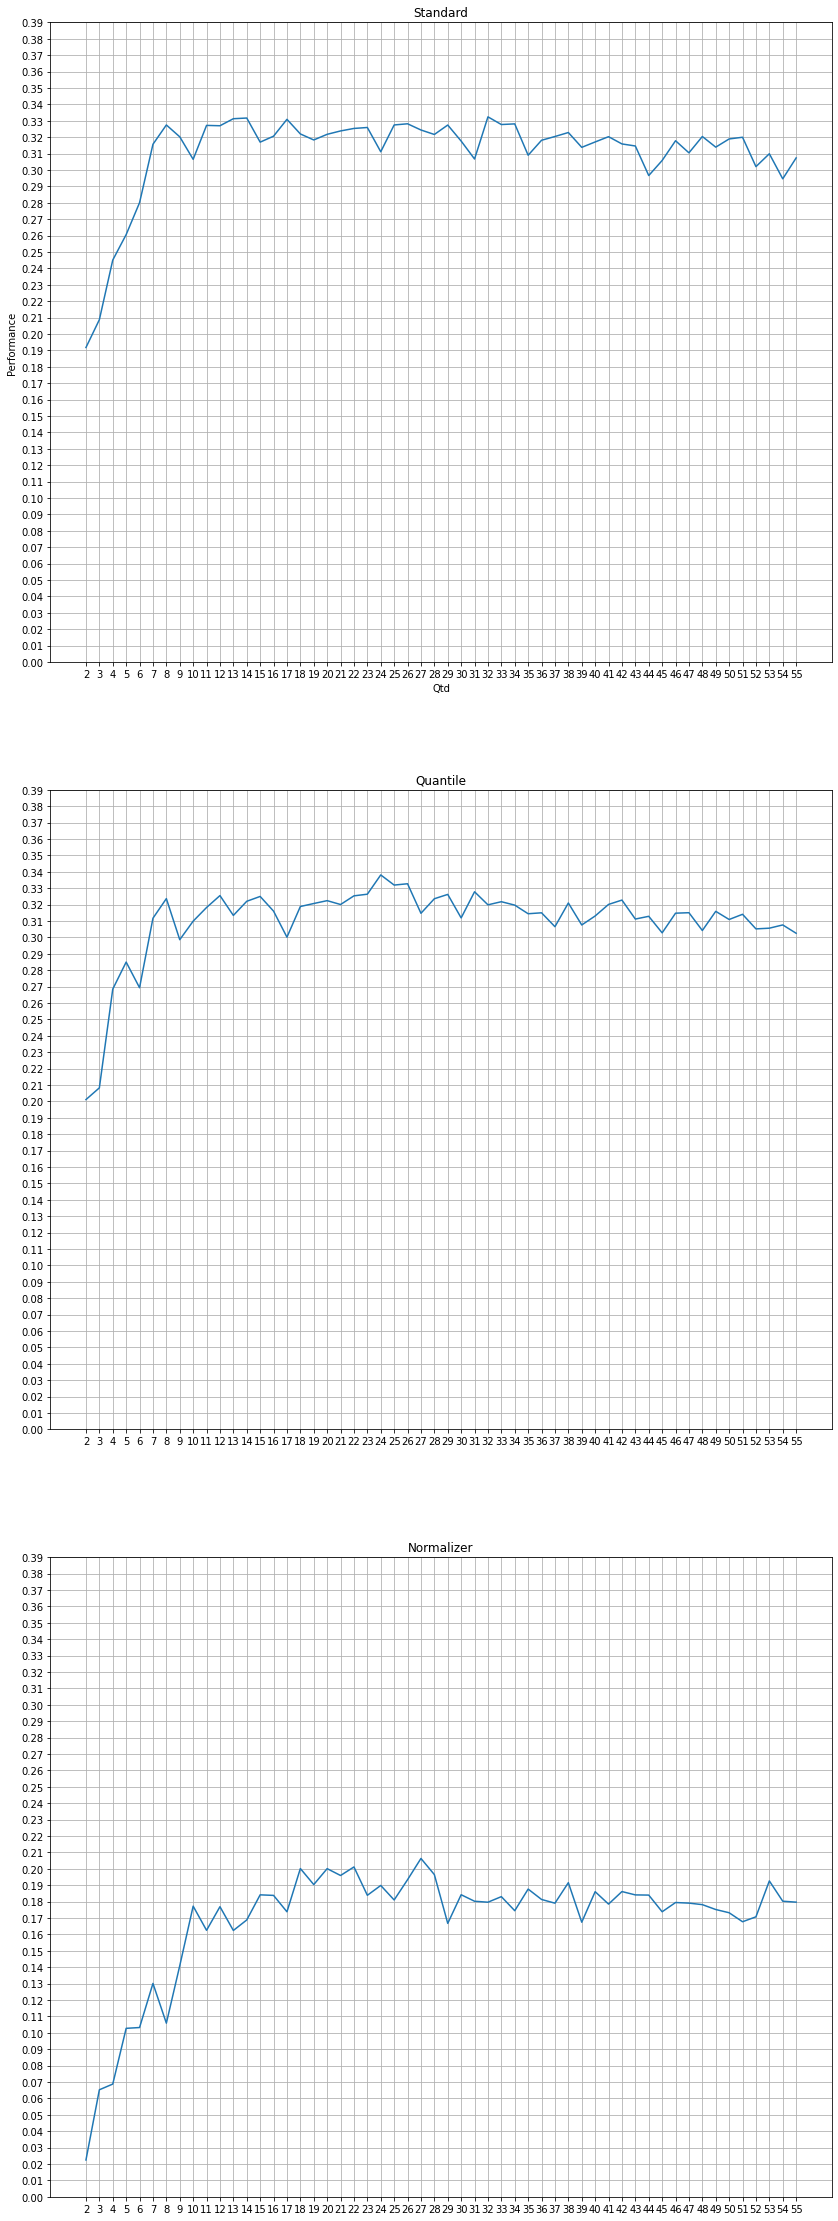

In [143]:
fig, axs = plt.subplots(3,  figsize = [14,40])

for n in [0,1,2]:
  axs[n].plot(resultados3[n]['Qtd'], resultados3[n]['Performance'])
  axs[n].set_title(lista_transf[n])
  axs[n].grid()
  axs[n].set_xticks(resultados3[0]['Qtd'])
  axs[n].set_yticks(np.arange(0.0, 0.40,0.01))

axs[0].set(xlabel='Qtd', ylabel='Performance')
plt.show()

Com os dados da seleção defino o subconjunto de features que obteve a melhor pontuação e rodo novamente os testes com os modelos.

In [144]:
features_import_selec = variaveis.iloc[0:best_q2,:1]
features_import_selec = features_import_selec['variavel'].values.tolist()
features_import_selec

['vv_DEC',
 'temp_OCT',
 'vv_SEP',
 'vv_OCT',
 'tmin_OCT',
 'ue_DEC',
 'umidsolos_ANN',
 'Prec_SEP',
 'temp_ANN',
 'Qo_NOV',
 'tmin_SEP',
 'Qg_SEP',
 'umidsolos_NOV',
 'Qo_SEP',
 'Qg_OCT',
 'umidsolos_DEC',
 'tmax_DEC',
 'Qg_NOV',
 'umidsolos_OCT',
 'Qg_DEC',
 'tmin_ANN',
 'ue_ANN',
 'temp_NOV',
 'ue_NOV']

In [145]:
dadosFeatImpX = dados[features_import_selec]
dadosy = dados['produtividade']

dadosFeatImpTX = transformacao(dadosFeatImpX)

resultado4 = []
for i in np.arange(len(lista_transf)):
  res = CompareML_kfold(dadosFeatImpTX[i], dadosy, lista_de_modelos, nome_dos_modelos, validacao)
  resultado4.append(res)

for i in np.arange(len(resultado4)):
  print("Transformação : "+lista_transf[i])
  print(resultado4[i])
  print()

Transformação : Standard
                     R2            EQM         EMA
LinearReg      0.180654 -333075.932448 -456.510531
LassoLars      0.210519 -323740.421224 -453.973071
Ridge          0.200949 -325498.670346 -451.044732
BayesianRidge  0.212261 -322197.922542 -449.466839
Knn            0.210755 -317186.435514 -455.027360
DTree         -0.127631 -443636.210020 -521.386051
RanFor         0.322653 -276433.719654 -420.225687
GradBoost      0.289919 -290620.302302 -425.813099
LGBM           0.304438 -281150.530229 -422.835062

Transformação : Quantile
                     R2            EQM         EMA
LinearReg      0.169244 -333757.117492 -457.324818
LassoLars      0.229199 -317936.065178 -448.309460
Ridge          0.217339 -317921.907157 -448.982280
BayesianRidge  0.216531 -323199.170351 -452.761198
Knn            0.248316 -308546.368711 -439.897791
DTree         -0.113691 -445452.565101 -523.837623
RanFor         0.326198 -273233.438580 -417.785030
GradBoost      0.275270 -294859

Com a nova seleção de variáveis os melhores resultados ainda foram com o *Randon Forest* e o *Gradient Boosting* também com a transformação *Standard*.

###**5.5 - Hipertunagem** <a name="hipertunagem"></a>

Após ter identificado os modelos, o subconjunto de features e a tranformação que obtiveram o melhor resultado, posso tentar otimizar os modelos com uma técnica de hipertunagem de parâmetros testando algumas combinações e se estas melhoram os resultados obtidos. 

In [146]:
validacao = RepeatedKFold(n_splits = 10, n_repeats = 30)

testeTunModels = [RandomForestRegressor()]
testeTunParams = [
                  {
                   'min_samples_split': [2, 5, 10],
                   'min_samples_leaf': [1, 3, 5],
                   'max_depth' : [2, 4, 5, 6, 7],
                   'n_estimators': [50, 100, 125, 150, 175]
                  }
]

dadosHipX = dados[features_import_selec]
dadosy = dados['produtividade']

#Standard
escalaS = StandardScaler().fit(dadosHipX)
transfX = escalaS.transform(dadosHipX)
df = pd.DataFrame(transfX, columns=dadosHipX.columns) #Transformando o retorno de numpy.ndarray para data frame
dadosHipTX = df

In [147]:
for i in range(len(testeTunModels)):
  ret = Tunagem(testeTunModels[i], dadosHipTX, dadosy, testeTunParams[i], validacao, 'r2')
  print(ret)

Fitting 300 folds for each of 225 candidates, totalling 67500 fits
{'bestModel': RandomForestRegressor(max_depth=6, n_estimators=150), 'bestScore': 0.3512870654721305, 'bestParam': {'max_depth': 6, 'min_samples_leaf': 1, 'min_samples_split': 2, 'n_estimators': 150}}


No resultado da hipertunagem o *Randon Forest* se manteve como o melhor modelo ainda obtendo uma melhoria no resultado com algumas mudanças nos parâmetros utilizados.

In [148]:
#Best Selection
#'bestParam': {'max_depth': 6, 'min_samples_leaf': 1, 'min_samples_split': 2, 'n_estimators': 150}

###**5.6 - Modelo Final** <a name="final"></a>

Com todos os resultados e parâmetros obtidos nos passos anteriores é possível agora configurar o modelo final 

In [149]:
dadosFX = dados[features_import_selec]
dadosy = dados['produtividade']

#Transformação
escalaS = StandardScaler().fit(dadosFX)
transfX = escalaS.transform(dadosFX)
df = pd.DataFrame(transfX, columns=dadosFX.columns)
dadosFTX = df

modelo = RandomForestRegressor(max_depth=6, min_samples_leaf=1, min_samples_split=2, n_estimators=150)
modelo.fit(dadosFTX, dadosy)


RandomForestRegressor(max_depth=6, n_estimators=150)

##**6 - Conclusão** <a name="conclusao"></a>

Nos testes realizados foi possível obter um r2 médio de cerca de 0.35, esta métrica indica que com apenas os dados meteorológicos podemos explicar até 35% da variabilidade da produtividade na cultura do amendoim, com isso é possível concluir que: 
* Os fatores ambientais são sim significativos para o resultado da colheita; 
* Mas apenas estes fatores são insuficientes para se obter uma predição mais precisa;

É bem provável que a inclusão de outros fatores na análise como: condições do solo, qualidade das sementes e características do manejo, tragam uma melhora na predição de produtividade do modelo.
Além disso, um quantidade maior de registros, preferencialmente com variação da região analisada, pode trazer uma melhor confiabilidade ao modelo.

Uma análise interessante a ser feita é a observação das principais features selecionadas tanto pelo método final utilizando o Randon Forest quanto pelo método de seleção das variáveis de maior correlação, cruzando as 2 seleções temos destaque para:
* A Precipitação no início do ciclo ( Setembro ); 
* A Temperatura principalmente de Outubro;
* A Irradiação solar dos meses de Setembro e Novembro;
* E a Velocidade do Vento em praticamente todo o ciclo, que pode ter relação tanto no controle climática quanto algum impacto físico nas plantas;

Entendendo melhor o impacto dessas variáveis na cultivo poderia levar a técnicas ou práticas para se ter maior controle no resultado das colheitas.


##**7 - Fontes** <a name="fontes"></a>

**Dados de produção de amendoim**: 
cedidos pelo prof. Dr. Glauco de Souza Rolim - Unesp / Mini-curso da Penaut Tech

**Outras Informações**:

* Embrapa - Sistema de Produção de Amendoim : https://www.spo.cnptia.embrapa.br/conteudo?p_p_id=conteudoportlet_WAR_sistemasdeproducaolf6_1ga1ceportlet - Acessado em 01/11/2021

* Revista Globo Rural: https://revistagloborural.globo.com/Noticias/Empresas-e-Negocios/noticia/2021/06/exportacao-de-amendoim-natura-brasileiro-cresce-12-em-meio-pandemia.html  - Acessado em 01/11/2021
